# Note and title review pairs

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
import tools
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
plt.rcParams['lines.markersize'] = 1

In [3]:
pairs = tools.note_short_pairs("avis.json")[:5000]

## n-grams + TF-IDF + euclidien distance/cos distance

In [4]:
tfidf = TfidfVectorizer(ngram_range=[1, 3], norm='l2')
bow = tfidf.fit_transform([t[1] for t in pairs])
tsne = TSNE(n_components=2)
tsne_fit = tsne.fit_transform(bow)

/Users/maxhsia/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/maxhsia/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


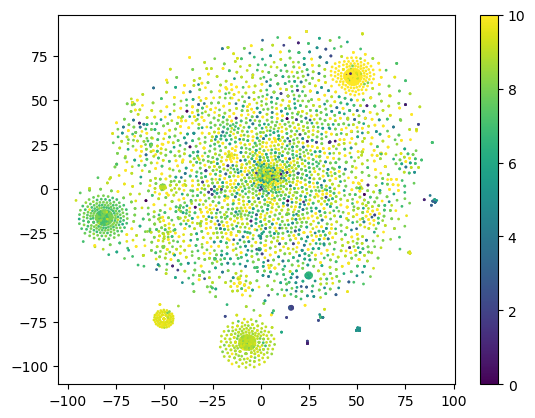

In [5]:
def myscatter(points2d):
  c = [t[0] for t in pairs[:len(points2d)]]
  scatter = plt.scatter(points2d[:, 0], points2d[:, 1], c=c, cmap='viridis')
  plt.colorbar(scatter)
  plt.show()

myscatter(tsne_fit)

### RM

The good clusters are like 'A posséder' or 'Chef-d'oeuvre'.

In [6]:
tfidf = TfidfVectorizer(ngram_range=[1, 3], norm='l1')
bow = tfidf.fit_transform([t[1] for t in pairs])
tsne = TSNE(n_components=2)
tsne_fit = tsne.fit_transform(bow)

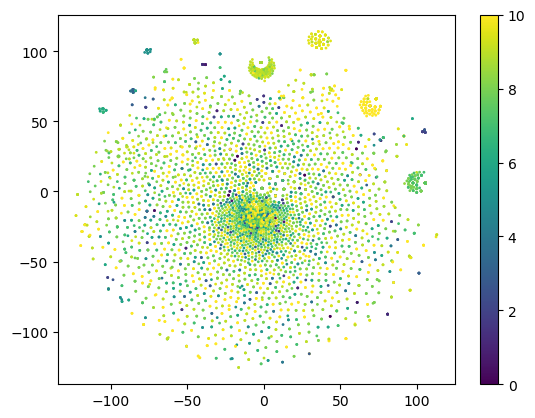

In [7]:
myscatter(tsne_fit)

## 2,2-grams it's locally quite interesting

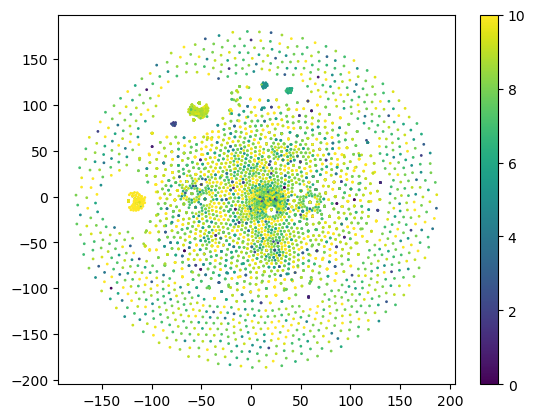

In [8]:
tfidf = TfidfVectorizer(ngram_range=[2, 2], norm='l2')
bow = tfidf.fit_transform([t[1] for t in pairs])
tsne = TSNE(n_components=2)
tsne_fit = tsne.fit_transform(bow)
myscatter(tsne_fit)

## 1,2-grams would suffice, so no need to use 1,3 as before

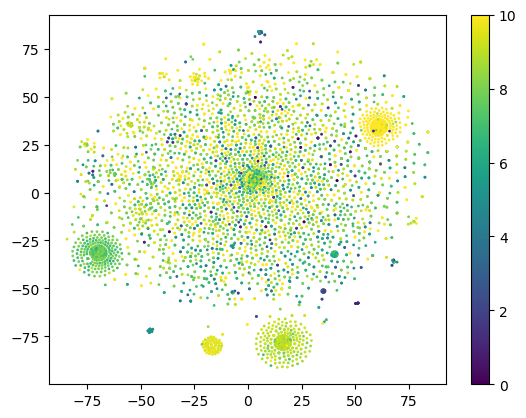

In [9]:
tfidf = TfidfVectorizer(ngram_range=[1, 2], norm='l2')
bow = tfidf.fit_transform([t[1] for t in pairs])
tsne = TSNE(n_components=2)
tsne_fit = tsne.fit_transform(bow)
myscatter(tsne_fit)

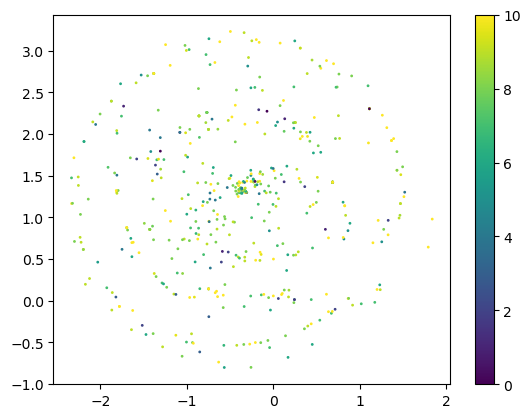

In [11]:
tsne = TSNE(n_components=2, metric=cosine_similarity)
tsne_fit = tsne.fit_transform(bow[:500])
myscatter(tsne_fit)

### RM

cos distance is too slow and seemingly useless.